# Аналіз та обробка великих даних

Ю.С. Процик. Курс лекцій

# Тема 6. Фреймворк для роботи з великими даними Apache Spark

### План

1. [Що таке Apache Spark](#1.-Що-таке-Apache-Spark)
2. [Ключові відмінності між Apache Spark та Apache Hadoop](#2.-Ключові-відмінності-між-Apache-Spark-та-Apache-Hadoop)
3. [Основні переваги Apache Spark](#3.-Основні-переваги-Apache-Spark)
4. [Робочі навантаження Apache Spark](#4.-Робочі-навантаження-Apache-Spark)
5. [Область використання](#5.-Область-використання)
6. [Apache Spark у хмарі](#6.-Apache-Spark-у-хмарі)
7. [Приклади](#7.-Приклади)

### 1. Що таке Apache Spark

**Apache Spark** – це фреймворк для розподіленої обробки даних із відкритим вихідним кодом, що використовується для обробки великих даних. Швидке виконання аналітичних запитів до даних будь-якого обсягу забезпечується завдяки кешуванню в пам'яті та оптимізованого виконання запитів. Apache Spark надає API для розробки мовами Java, Scala, Python і R, а також підтримує повторне використання коду для різних робочих навантажень - пакетної обробки, інтерактивних запитів, аналітики в реальному часі, машинного навчання та обробки графів. Його використовують організації з будь-якої галузі, у тому числі у FINRA, Yelp, Zillow, DataXU, Urban Institute та CrowdStrike.

Apache Spark було запущено у 2009 році як дослідницький проект AMPLab Каліфорнійського університету у Берклі. Це спільний проект студентів, дослідників та викладачів, присвячений областям застосунків з інтенсивним використанням даних. Метою Spark було створення нової інфраструктури, оптимізованої для швидкої ітеративної обробки, такої як машинне навчання та інтерактивний аналіз даних при збереженні масштабованості та відмовостійкості Hadoop MapReduce. Першу статтю під назвою Spark: Cluster Computing with Working Sets було опубліковано у червні 2010 року, а вихідний код Spark було відкрито під ліцензією BSD. У червні 2013 року Spark отримав статус інкубатора у Фонді програмного забезпечення Apache (ASF) та у лютому 2014 року було створено повноцінний проект Apache. Spark може працювати автономно, на Apache Mesos або найчастіше Apache Hadoop.

Hadoop MapReduce – це модель програмування обробки великих наборів даних з допомогою паралельного розподіленого алгоритму. Розробники можуть писати багаторазово розпаралелені оператори, не турбуючись про розподіл роботи та відмовостійкість. Проте проблема MapReduce полягає у послідовному багатоетапному процесі виконання завдання. На кожному кроці MapReduce зчитує дані з кластера, виконує операції та записує результати назад у HDFS. Оскільки кожен крок вимагає читання та запису на диск, завдання MapReduce виконуються повільніше через затримку операції вводу-виводу на диск.

Spark був створений для усунення обмежень MapReduce за рахунок обробки в пам'яті, скорочення кількості кроків у завданні та повторного використання даних у кількох паралельних операціях. При використанні Spark потрібен лише один крок для зчитування даних у пам'ять, виконання операцій та зворотний запис результатів, що значно прискорює виконання. Spark також повторно використовує дані, застосовуючи кеш у пам'яті для значного прискорення алгоритмів машинного навчання, які часто викликають функцію в тому самому наборі даних.

<img src="../img/img0601.png" width=100%/>

---
<img src="../img/img0602.png" width="600"/>

---
<img src="../img/img0603.png" width="700"/>

**Задача:** Розробити дизайн абстракції розподіленої пам'яті за допомогою fault tolerant та ефективності.

**Рішення:** Resilient Distributed Datasets (**RDD**) – це основна абстракція даних у бібліотеці Apache Spark, що є набором об'єктів, які кешуються в пам'яті і повторно використовуються в декількох операціях Spark. Це значно знижує затримку, завдяки чому Spark у кілька разів швидший за MapReduce, особливо при машинному навчанні та інтерактивній аналітиці.

**RDD**

- Абстрактне представлення розподіленої RAM
- Immutable колекція об'єктів розподілених по всьому кластеру
- RDD ділиться на партиції, які є атомарними частинами інформації
- Партиції RDD можуть зберігатися на різних нодах кластера

У RDD підтримуються операції двох типів:

- **Трансформації** – це операції (наприклад, відображення, фільтрація, об'єднання тощо), що здійснюються над RDD; результатом трансформації стає новий RDD, що містить її результат.

- **Дії** – це операції (наприклад, редукція, підрахунок і т.д.), які повертають значення, що одержується в результаті деяких обчислень в RDD.

### 2. Ключові відмінності між Apache Spark та Apache Hadoop

Незважаючи на відмінності в дизайні Spark і Hadoop MapReduce, багато організацій вважають ці інфраструктури великих даних взаємодоповнюючими та використовують їх разом для вирішення більших бізнес-задач.

Hadoop – це платформа з відкритим вихідним кодом, що використовує розподілену файлову систему Hadoop (HDFS) як сховище, YARN як спосіб управління обчислювальними ресурсами, що використовуються різними програмами, та реалізацію моделі програмування MapReduce як рушій виконання. У типовій реалізації Hadoop також використовуються різні механізми виконання, такі як Spark, Tez та Presto.

Spark – це платформа з відкритим вихідним кодом, орієнтована на інтерактивні запити, машинне навчання та робочі навантаження у реальному часі. Вона не має власної системи зберігання, але вона виконує аналітику в інших системах зберігання даних, таких як HDFS, або в інших популярних сховищах, таких як Amazon Redshift, Amazon S3, Couchbase, Cassandra та інших. Spark на Hadoop використовує YARN для спільного використання кластера та набору даних, як і інші компоненти Hadoop, забезпечуючи стабільний рівень обслуговування та відгуку.

### 3. Основні переваги Apache Spark

Apache Spark має безліч переваг, які роблять його одним з найактивніших проектів в екосистемі Hadoop. Приклади наведені нижче.

**Швидкість** 

Spark може забезпечувати швидке виконання аналітичних запитів до даних будь-якого обсягу завдяки кешування в пам'яті та оптимізованого виконання запитів.

**Зручність для розробників**

Apache Spark за замовчуванням підтримує Java, Scala, R та Python, що дозволяє вибирати мову для написання програм. Ці API полегшують роботу розробників, оскільки приховують складність розподіленої обробки за простими високорівневими операторами, що значно скорочує обсяг необхідного коду.

**Підтримка кількох робочих навантажень**

Apache Spark підтримує кілька робочих навантажень, включаючи інтерактивні запити, аналітику в реальному часі, машинне навчання та обробку графів. Одна програма може легко комбінувати кілька робочих навантажень.

### 4. Робочі навантаження Apache Spark

Платформа Spark включає:

- Spark Core як основа платформи

- Spark SQL для інтерактивних запитів

- Spark Streaming для аналітики у режимі реального часу

- Spark MLlib для машинного навчання

- Spark GraphX для обробки графів

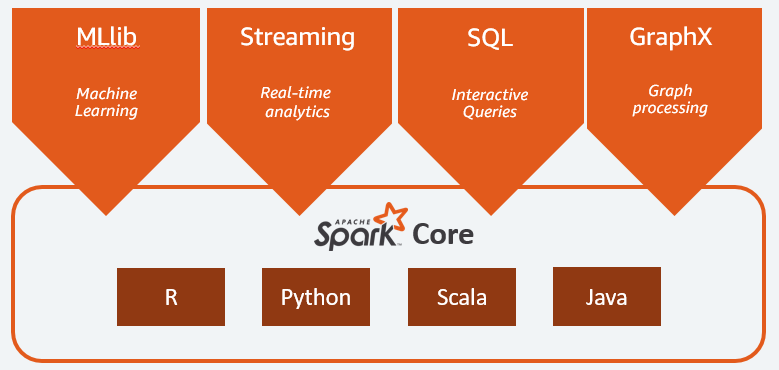

**Spark Core**

Spark Core є основою платформи - рушієм. Він відповідає за керування пам'яттю, усунення несправностей, планування, розподіл та моніторинг завдань, а також за взаємодію із системами зберігання даних. Spark Core доступний через інтерфейс прикладного програмування (API), створений для Java, Scala, Python і R. Ці API приховують складність розподіленої обробки за простими високорівневими операторами.

**MLlib**

Машинне навчання

Spark включає MLlib – бібліотеку алгоритмів, які підходять для машинного навчання будь-яких масштабів. Фахівці з обробки даних можуть навчати моделі машинного навчання на R або Python на будь-якому джерелі даних Hadoop, зберігати їх за допомогою MLlib, а також імпортувати їх в конвеєр на основі Java або Scala. Spark був розроблений для швидких інтерактивних обчислень, які проводяться в пам'яті, що дозволяє швидко виконувати операції машинного навчання. Алгоритми включають можливість класифікації, регресії, кластеризації, спільної фільтрації та аналізу закономірностей.

**Spark Streaming**

Режим реального часу

Spark Streaming – це рішення, що працює у режимі реального часу, яке використовує функцію швидкого планування Spark Core для аналізу потокової передачі. Це рішення приймає дані у вигляді міні-пакетів і дозволяє аналізувати їх за допомогою того ж прикладного коду, написаного для пакетної аналітики. Це підвищує продуктивність розробників, оскільки вони можуть використовувати той самий код для пакетної обробки і застосунків потокової передачі в реальному часі. Spark Streaming підтримує дані з застосунків Twitter, Kafka, Flume, HDFS та ZeroMQ, а також багато інших даних із екосистеми Spark Packages.

**Spark SQL**

Інтерактивні запити

Spark SQL – це розподілений механізм запитів, який опрацьовує інтерактивні запити з низькою затримкою майже в 100 разів швидше, ніж MapReduce. Він включає економічний оптимізатор, стовпчикове сховище та генерацію коду для швидких запитів із можливістю масштабування до тисяч вузлів. Для запитів до даних бізнес-аналітики можуть використовувати стандартний SQL або мову запитів Hive. Розробники можуть використовувати API, доступні мовами Scala, Java, Python та R. Вони підтримують різні вбудовані джерела даних, включаючи JDBC, ODBC, JSON, HDFS, Hive, ORC та Parquet. Інші популярні сховища - Amazon Redshift, Amazon S3, Couchbase, Cassandra, MongoDB, Salesforce.com, Elasticsearch та багато інших - можна знайти в екосистемі [Spark Packages](https://spark-packages.org/?q=tags%3A%22Data%20Sources%22).

**GraphX**

Обробка графів

Spark GraphX – це розподілене середовище обробки графів на основі Spark. GraphX надає ETL, дослідницький аналіз та ітеративні обчислення на графах, що дозволяють користувачам інтерактивно створювати та перетворювати графову структуру даних у будь-якому масштабі. Це середовище постачається з дуже гнучким API та набором розподілених алгоритмів Graph.

### 5. Область використання

Spark використовується у всіх типах сценаріїв використання великих даних для виявлення закономірностей та надання аналітичних даних у режимі реального часу. Приклади використання наведені нижче.

**Фінансові послуги**

Spark використовують у банківській сфері для прогнозування відтоку клієнтів та надання рекомендацій нових фінансових продуктів. У банківських інвестиціях Spark використовують для аналізу цін на акції з метою прогнозування майбутніх тенденцій.

**Охорона здоров'я**

Spark використовують співробітники організацій комплексного догляду за пацієнтами для надання даних про кожну взаємодію з пацієнтом своїм медичним працівникам первинної ланки. Spark також можна використовувати для прогнозування та надання рекомендацій для лікування пацієнтів.

**Обробна промисловість**

Spark використовують для запобігання простоям підключеного до Інтернету обладнання, рекомендуючи, коли проводити профілактичне обслуговування.

**Роздрібна торгівля**

Spark використовується для залучення та утримання клієнтів за допомогою персоналізованих послуг та пропозицій.

### 6. Apache Spark у хмарі

Spark – ідеальне робоче навантаження у хмарі, оскільки за рахунок масштабу хмара забезпечує продуктивність, масштабованість, надійність, доступність та значну економію. Дослідження ESG показало, що 43% респондентів вважають хмару основним місцем розгортання Spark. Основні причини, через які клієнти вважають хмару перевагою для Spark, – це швидке розгортання, підвищення доступності, частіші оновлення функцій і можливостей, підвищення еластичності, розширення географічного охоплення та плата за фактом використання.

[Amazon EMR](https://aws.amazon.com/emr/) – найкращий варіант розгортання Apache Spark у хмарі. Сервіс поєднує можливості інтеграції та строгість тестування, характерні для комерційних дистрибутивів Hadoop та Spark, з масштабованістю, простотою та економічністю хмари. Amazon EMR дозволяє запускати кластери Spark за лічені хвилини без необхідності виділяти вузли, налаштовувати та оптимізувати кластер або змінювати конфігурацію Spark. EMR дозволяє виділяти від одного до сотень і навіть тисяч обчислювальних інстансів за лічені хвилини. Можна використовувати автомасштабування, щоб EMR автоматично вертикально масштабував кластери Spark для обробки даних будь-якого розміру і повертався до них після завершення роботи, щоб не платити за ресурси, що не використовуються. Також, можна скоротити витрати, встановивши певний термін і заощадивши до 75%, використовуючи зарезервовані інстанси Amazon EC2, або запустивши кластери на вільних обчислювальних потужностях AWS і заощадивши до 90%, використовуючи EC2 Spot.

### 7. Приклади

#### Word Count (Scala)

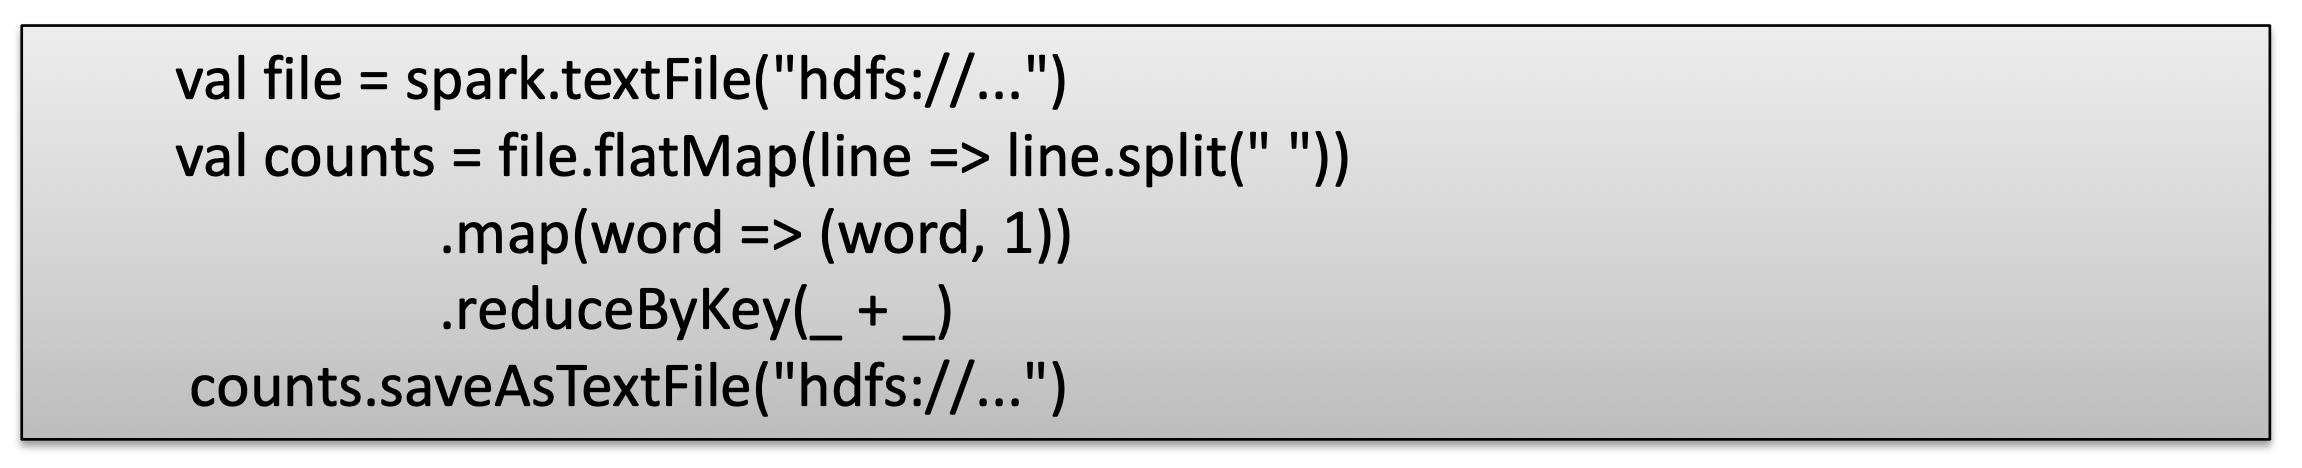


#### Word Count (Python)

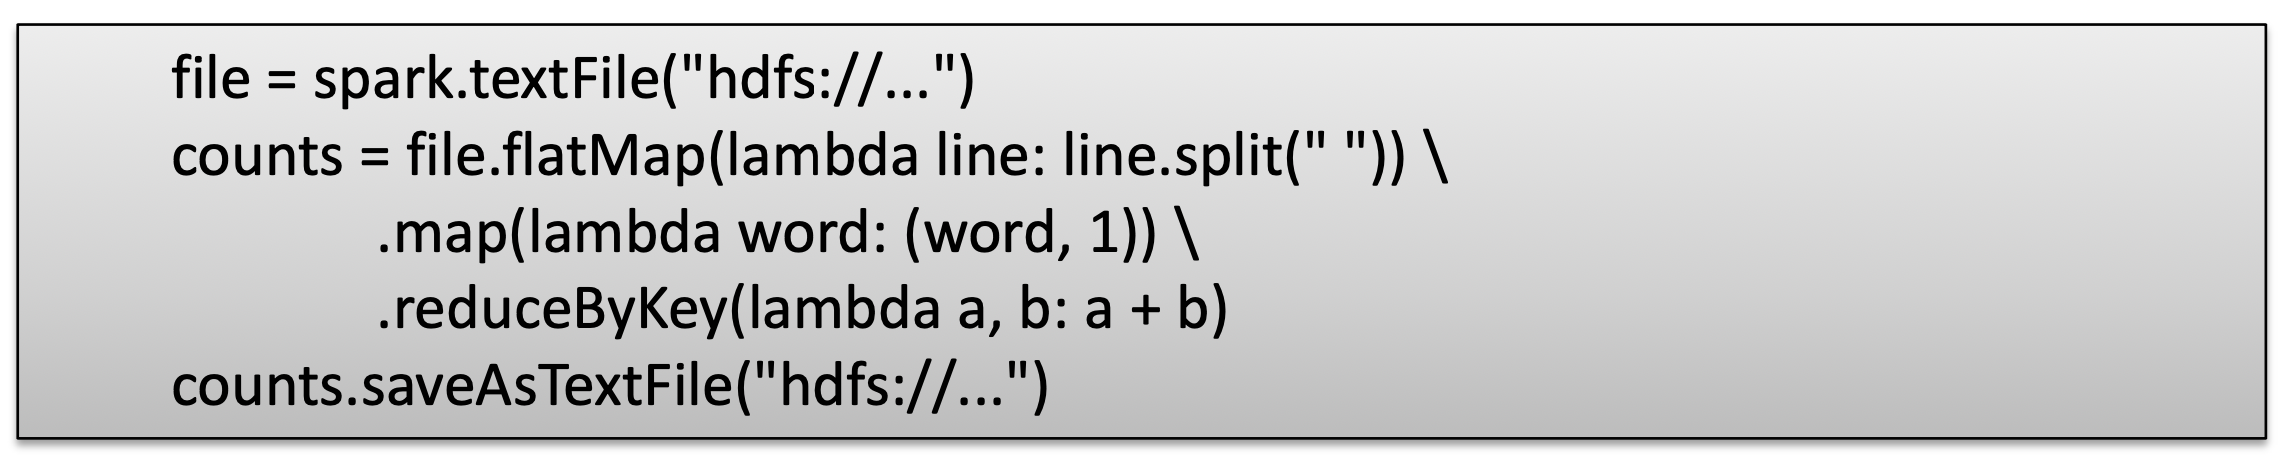

#### Word Count (Java)

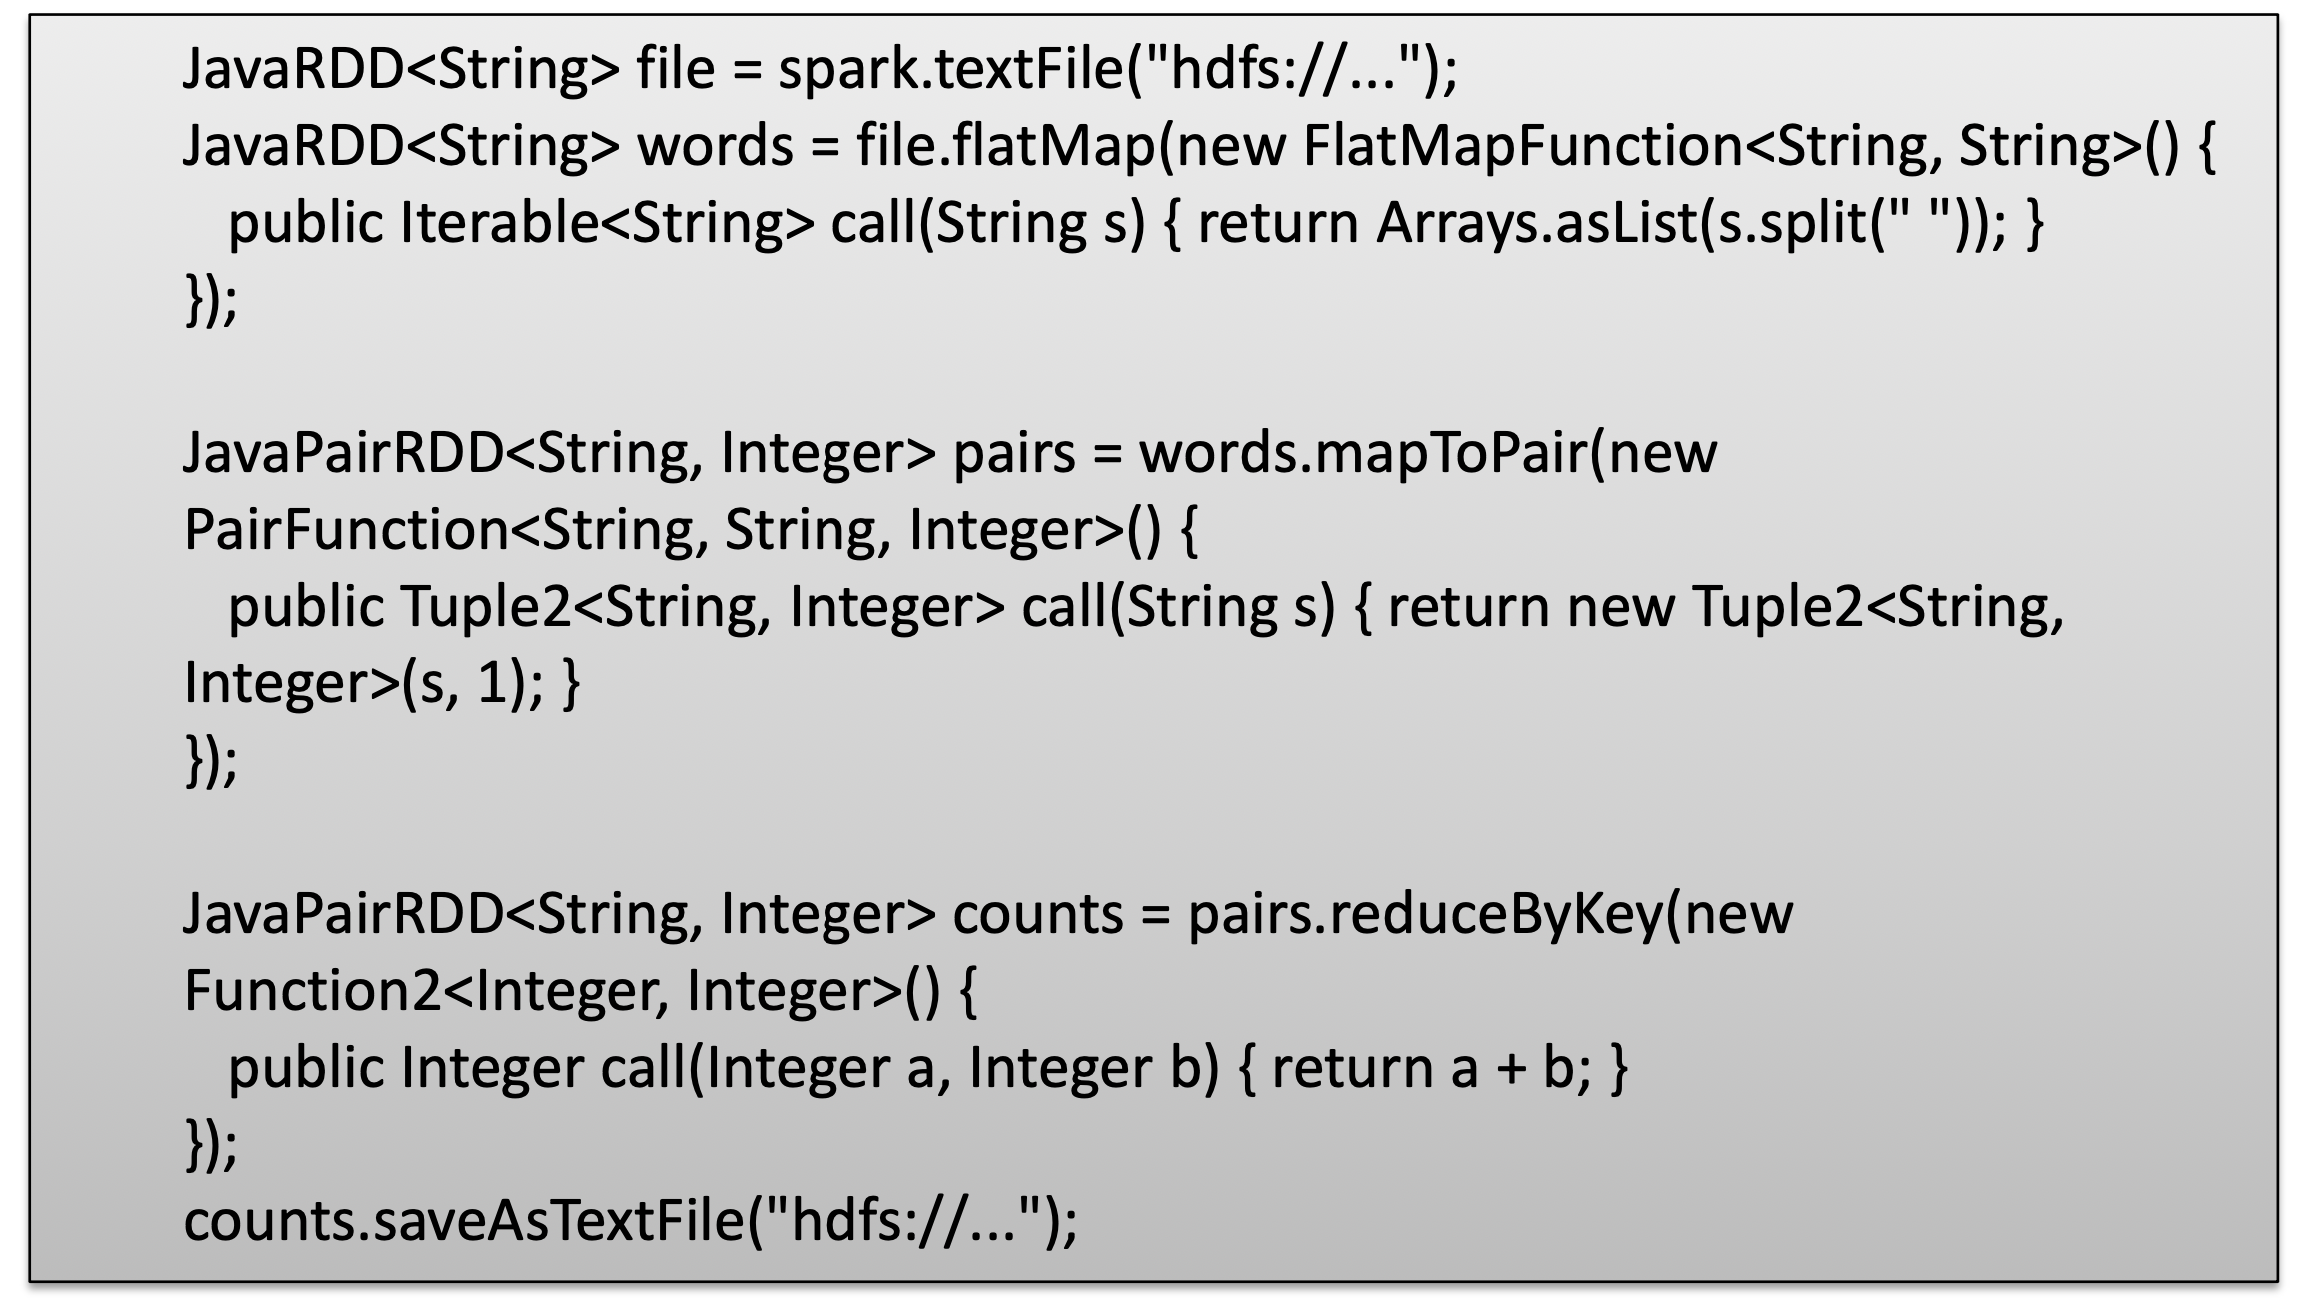